In [26]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
import csv 
import os 
import pathlib as Path 

TypeError: Image data of dtype <U20 cannot be converted to float

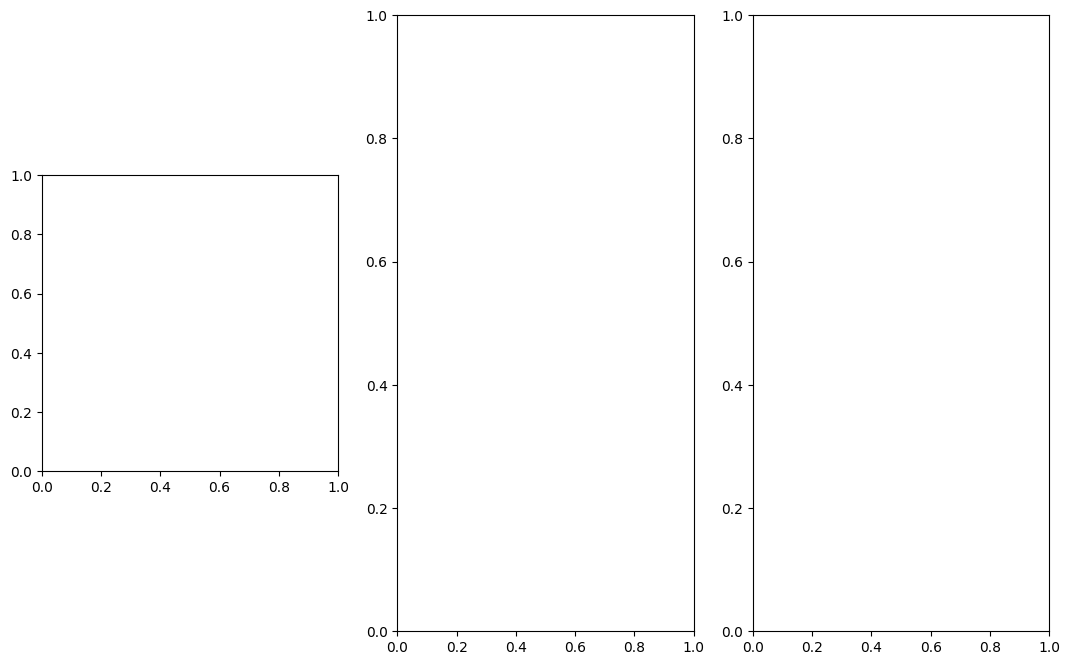

In [ ]:
import csv
import pathlib as Path

def export_data_maps(fichier_path):
    """
    Lit un fichier CSV en ignorant les 18 premières lignes.
    Récupère les valeurs des cellules B1 et B2 (lignes 19 et 20, colonne 2).
    Lit les 70 lignes suivantes (lignes 21 à 90) sur 103 colonnes.
    Retourne un dictionnaire : { (valeur_B1, valeur_B2) : liste de listes (70x103) }
    """
    #ne fonctionne pas encore 

    with open(fichier_path, mode='r', newline='', encoding='utf-8') as f:
        reader = csv.reader(f)
        rows = list(reader)

    # Récupérer B1 et B2
    b1 = rows[19][1] 
    b2 = rows[20][1]

    # Récupérer les 70 lignes suivantes 
    map = []
    for i in range(21, 91):  
        row = rows[i][:103]  
        map.append(row)

    # Créer le dictionnaire
    result = {(fichier_path[10:-4],b1, b2): map}

    return result

visualisation(export_data_maps('./biomass/EcospaceMapBiomass-Bacteria.csv'))


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


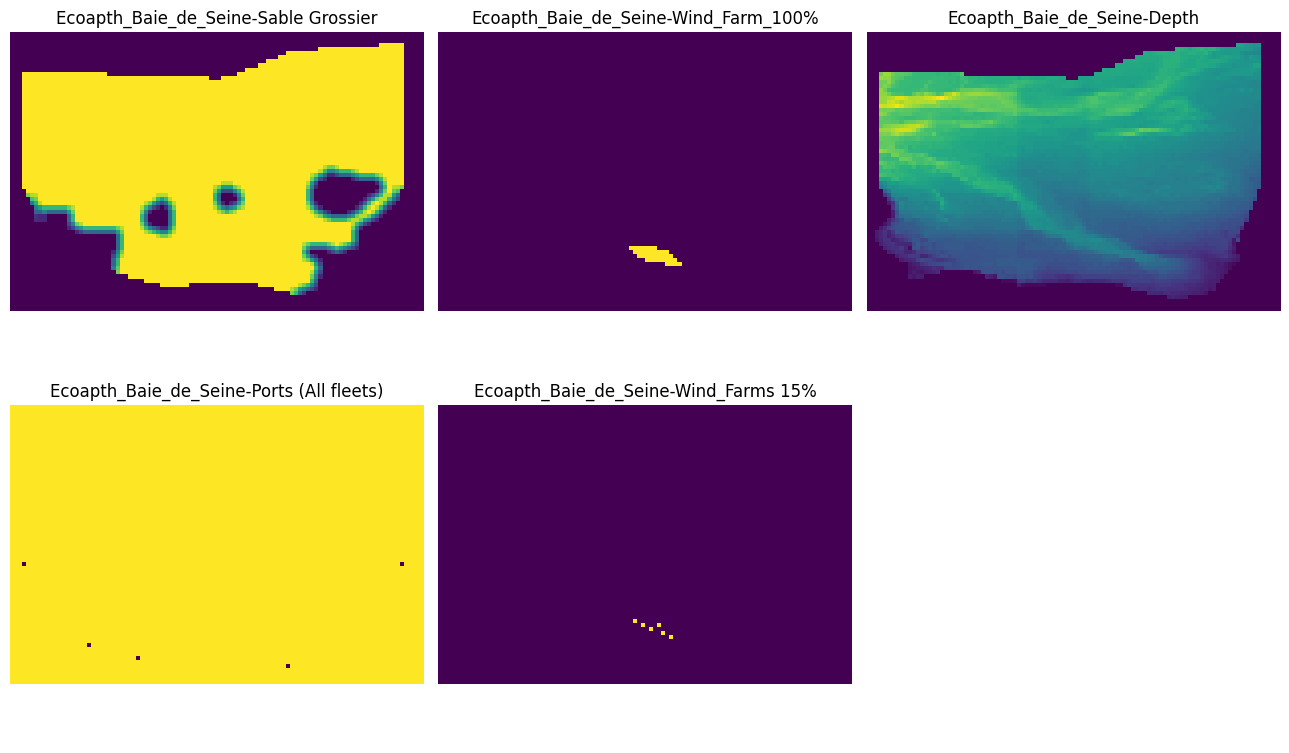

In [ ]:
def export_data_maps(folder):
    "output : données de cartes sous forme de dictionnaire" 
    #ne fonctionne pour l'instant que sur le dossier topology
    file_path = folder
    files = [f for f in os.listdir(file_path) if f.endswith(".csv")]

    
    name_files = [f[:-4] for f in files]
    datas = {name_file : [] for name_file in name_files}

    for f in files : 
        name_file = f[:-4]
        if folder == "./topology" : 
            data = pd.read_csv(os.path.join(file_path, f), skiprows=1)  # Ignore la première ligne
            data = data.iloc[:, 1:]  # Ignore la première colonne
        else : 
            data = pd.read_csv(os.path.join(file_path,f), skiprows = 19)
        data = data.apply(pd.to_numeric, errors="coerce")
        data = data.fillna(0)
        data = data.interpolate().to_numpy()

        print(data)

        datas[name_file] = data
        
    return datas

def visualisation(datas) :
    "datas : dictionnaire"

    fig, axs = plt.subplots(len(datas)//3 +1,3, figsize=(13,8))
    axs = axs.ravel()

    titles = []
    maps = []

    for key, value in datas.items() : 
        titles.append(key)
        maps.append(value)

    for i, ax in enumerate(axs):
        if i < len(datas) : 
            im = ax.imshow(maps[i], cmap="viridis")
            ax.set_title(titles[i])
            ax.axis("off")  

    for ax in axs[len(datas):]:
        ax.axis("off")

    plt.tight_layout()
    plt.show()

visualisation(export_data_maps("./topology"))



In [ ]:
def export_data_tables(file, studied_species, parameters) :
    "renvoie les paramètres recherchés pour les espèces recherchées sous la forme d'un dictionnaire"
    "avec les keys qui sont les noms d'espèces et les paramètres, et les values qui sont les données de chaque paramètre à "
    "l'indice de l'espèce dans le csv "
    with open(file, 'r') as csvfile : 
        csvreader = csv.reader(csvfile)
        rows = list(csvreader)
    headers = rows[0]

    data = {header: [] for header in headers}
    #construire la liste contenant toutes les données 
    for row in rows[2:]:
        for i, valeur in enumerate(row):
            if i < len(headers):
                data[headers[i]].append(valeur)
    data.pop(headers[0])

    for idx, species_name in enumerate(data['Group name']):
        if species_name in studied_species :
            print(f"\nEspèce : {species_name}")
            for param in parameters:
                value = data[param][idx] if idx < len(data[param]) else "N/A"
                if value == '' :
                    print(f"  {param} : No info")
                else : 
                    print(f"  {param} : {value}")

studied_species = ['Benthic inv. deposit feeders (Surface)', 'Benthic inv. bivalves filter feeders', 'Fish whiting']
parameters = ['Pelagic and bottom trawls targeting small pelagics (EUR/biomass)', 'Bottom trawls targeting demersals and cephalopods (EUR/biomass)', 'Pelagic trawls targeting demersals (EUR/biomass)']

export_data_tables('./Ecoapth_Baie_de_Seine-Off-vessel price.csv', studied_species, parameters)


Espèce : Benthic inv. deposit feeders (Surface)
  Pelagic and bottom trawls targeting small pelagics (EUR/biomass) : No info
  Bottom trawls targeting demersals and cephalopods (EUR/biomass) : No info
  Pelagic trawls targeting demersals (EUR/biomass) : No info

Espèce : Benthic inv. bivalves filter feeders
  Pelagic and bottom trawls targeting small pelagics (EUR/biomass) : No info
  Bottom trawls targeting demersals and cephalopods (EUR/biomass) : No info
  Pelagic trawls targeting demersals (EUR/biomass) : No info

Espèce : Fish whiting
  Pelagic and bottom trawls targeting small pelagics (EUR/biomass) : 4.5
  Bottom trawls targeting demersals and cephalopods (EUR/biomass) : 4.5
  Pelagic trawls targeting demersals (EUR/biomass) : 4.5
{'Group name': ['Bacteria', 'Microzooplankton', 'Meszooplankton and Macrozooplancton', 'Meiofauna', 'Suprabenthos', 'Benthic inv. deposit feeders (Surface)', 'Benthic inv. deposit feeders (Subsurface)', 'King scallop', 'Benthic inv. bivalves filter fe